# Build a model that can learn from the measurements and accurately classify the Iris flowers into their respective species

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import model_selection 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
data=pd.read_csv('IRIS.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [6]:
columns=(['sepal_length','sepal_length','petal_length','petal_width','species'])

# Visualizing the data

In [7]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

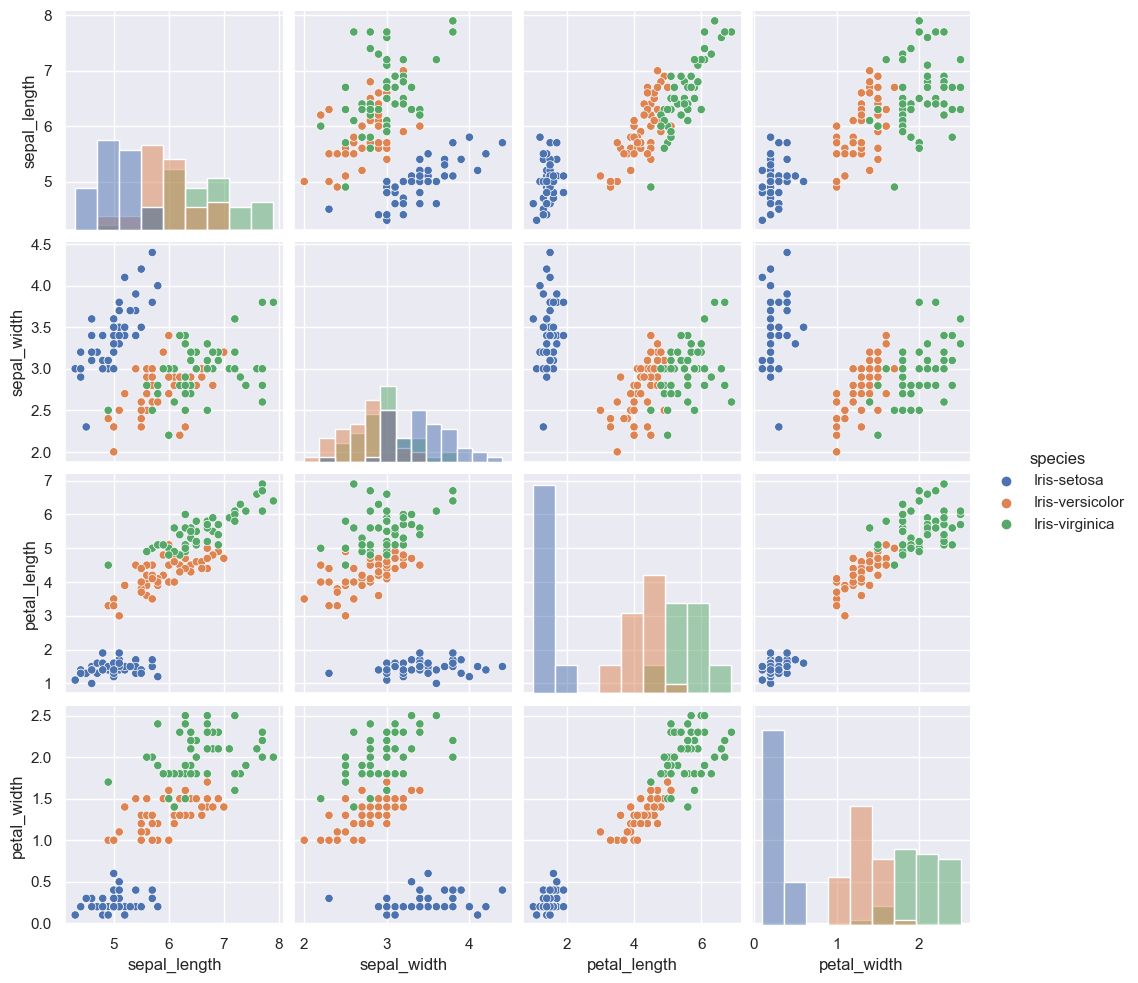

In [8]:
sns.pairplot(data, hue='species',diag_kind='hist')

In [9]:
new_data = data.values
x = new_data[:,0:4]
y = new_data[:,4]

In [10]:
#Separated the features from the targeted values
y_new_Data = np.array([np.average(x[:, i][y==j].astype('float32')) 
for i in range (x.shape[1])
                       for j in (np.unique(y))])
y_Data_reshaped = y_new_Data.reshape(4, 3)
y_Data_reshaped = np.swapaxes(y_Data_reshaped, 0, 1)
x_axis = np.arange(len(columns)-1)
width = 0.25

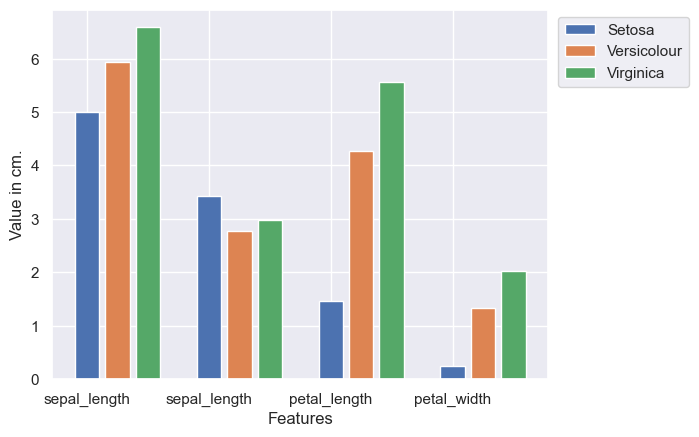

In [11]:
plt.bar(x_axis, y_Data_reshaped[0], width=0.2, label = 'Setosa')
plt.bar(x_axis+width, y_Data_reshaped[1], width=0.2, label = 'Versicolour')
plt.bar(x_axis+width*2, y_Data_reshaped[2], width=0.2, label = 'Virginica')
plt.xticks(x_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

# Testing and Training the data 

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

# Evaluation of the data

In [14]:
pred=svc.predict(x_test)
accuracy_score(y_test,pred)

0.9777777777777777

In [15]:
#Detailed classification report
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



# Testing the data

In [16]:
x_new=np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
new_pred=svc.predict(x_new)
print('Prediction of Species: {}'.format(new_pred))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [17]:
x_new=np.array([[4,3,2,0.3],[3.9,1.2,4.8,1.1],[4.3,3.5,5.6,1.9]])
new_pred=svc.predict(x_new)
print('Prediction of Species: {}'.format(new_pred))

Prediction of Species: ['Iris-setosa' 'Iris-virginica' 'Iris-virginica']


In [18]:
x_new=np.array([[6,4,2,0.1],[5.2,3,2.5,1.0],[5.8,2,4.9,3]])
new_pred=svc.predict(x_new)
print('Prediction of Species: {}'.format(new_pred))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [19]:
x_new=np.array([[5,5,2,0.1],[3,2,5.8,0.2],[4.3,3.5,5.6,1.9]])
new_pred=svc.predict(x_new)
print('Prediction of Species: {}'.format(new_pred))

Prediction of Species: ['Iris-setosa' 'Iris-virginica' 'Iris-virginica']
